# Leapfrog Daily Exercise

### Today, we will implement the nonlinear pendulum using the Leapfrog method and compare the results with 2nd order Runge Kutta.

 - First, implement 2nd order Runge-Kutta using the non-linear pendulum from last week's in-class activity. I added in two plots: x vs t and y vs t.

-  Then, implement the leapfrog method and generate the same plots. In a cell below your work, make notes on your observations. 

As a reminder, we are solving the 2nd order Ordinary Differential Equation (ODE) for a non-linear pendulum:

$$\frac{d^2\theta}{dt^2} = -\frac{g}{l}\sin{\theta}$$

In [1]:
%matplotlib inline
from math import sin, pi,cos
from numpy import linspace, array
from pylab import plot, show, axes

In [2]:
g = 9.81 # m/s
l = 1
# define your function for your ODEs here

def f(r):
    theta = r[0]
    omega = r[1]
    dtheta = omega
    domega = -g/l * sin(theta)
    return array([dtheta,domega],float)

In [63]:
# define your 2nd-order Runge-Kutta here
a,b,N = 0,100,1000
T = linspace(a,b,N)

theta0 = pi/4
omega0 = 0.0
xs = []
ys = []
E = []
r = array([theta0,omega0],float)
xs.append(l*sin(r[0]))
ys.append(-l*cos(r[0]))
h = (b-a)/N
for t in T:
    k1 = h*f(r)
    k2 = h*f(r+0.5*k1)
    #k3 = h*f(r+0.5*k2)
    #k4 = h*f(r+k3)
    r += k2 #(k1+2*k2+2*k3+k4)/6
    xs.append(l*sin(r[0]))
    ys.append(-l*cos(r[0]))

/Users/mkuchera/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


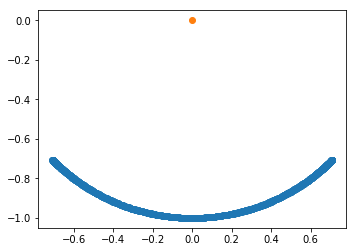

In [64]:
plot(xs,ys,'o')
plot(0,0,'o')
axes().set_aspect("equal")
show()

1000 1001


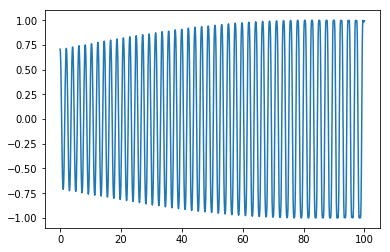

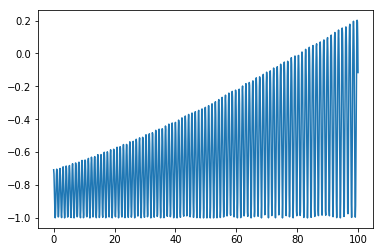

In [55]:
print(len(T), len(xs))
plot(T,xs[:-1])
show()
plot(T,ys[:-1])

In [56]:
## add your leapfrog code in the following cells. 
# You can use the code above, including f(r). 
# The RK4 algorithm may be a nice wireframe for your work

In [59]:
# define your 2nd-order Runge-Kutta here
a,b,N = 0,100,1000
T = linspace(a,b,N)

theta0 = pi/4
omega0 = 0.0
xs2 = []
ys2 = []
#E = []
r = array([theta0,omega0],float)
xs2.append(l*sin(r[0]))
ys2.append(-l*cos(r[0]))
h = (b-a)/N
r_half = r + h*f(r)/2 
for t in T:
    r += h*f(r_half)
    r_half += h*f(r)
    xs2.append(l*sin(r[0]))
    ys2.append(-l*cos(r[0]))

In [60]:
print(len(T), len(xs2))

1000 1001


/Users/mkuchera/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


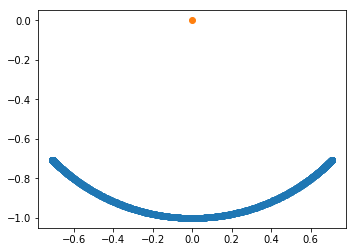

In [61]:


plot(xs2,ys2,'o')
plot(0,0,'o')
axes().set_aspect("equal")
show()

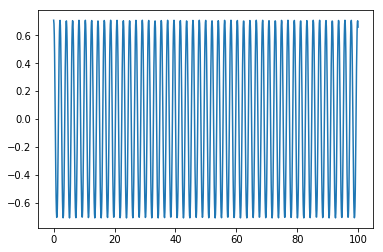

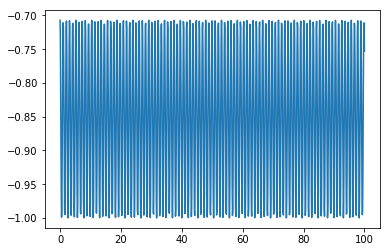

In [62]:
plot(T,xs2[:-1])
show()
plot(T,ys2[:-1])